## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# TODO - your code!
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-03 01:57:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-02-03 01:57:52 (130 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [0]:
import pandas as pd
df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')

In [5]:
df = df.replace({'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dems = df[df['party']=='democrat']
reps = df[df['party']=='republican']

In [0]:
from scipy.stats import t, ttest_1samp, ttest_ind
import numpy as np

In [8]:
dems['religious-groups'].mean()

0.47674418604651164

In [0]:
rg_dems = dems['religious-groups'].dropna()
n = len(rg_dems)

dof = n-1

big_mean = np.mean(rg_dems)

sample_std = np.std(rg_dems, ddof=1)
sample_stderr = sample_std / n**.5

In [15]:
CI = t.interval(.95, dof, loc=big_mean, scale=sample_stderr)
CI

(0.4153918266374824, 0.5380965454555409)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

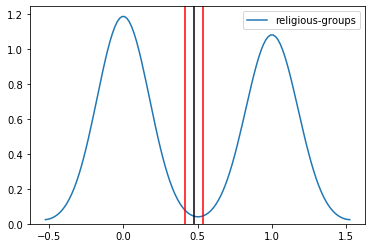

In [17]:
sns.kdeplot(rg_dems)

plt.axvline(x=big_mean, color='k')
plt.axvline(x=CI[0], color='r')
plt.axvline(x=CI[1], color='r');

95% of samples will lie inbetween .415 and .538

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [19]:
adult_df = pd.read_csv(url, na_values=" ?")
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
adult_df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [22]:
adult_df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [32]:
sal_ed = pd.crosstab(adult_df['salary'], adult_df['education'], margins=True)
sal_ed

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
salary,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904,24720
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387,7841
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


In [29]:
row_sums = sal_ed.iloc[0:2, 16].values
column_sums = sal_ed.iloc[2, 0:16].values

print(row_sums)
print(column_sums)

[24720  7841]
[  933  1175   433   168   333   646   514  1067  1382  5355   413 10501
  1723    51   576  7291]


In [0]:
total = sum(row_sums)

In [35]:
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in column_sums:
    expected_val = column * row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
expected

array([[ 708.3246829 ,  892.04877   ,  328.72946163,  127.54399435,
         252.81041737,  490.43702589,  390.22388747,  810.05620221,
        1049.20119161, 4065.46481988,  313.54565277, 7972.25883726,
        1308.08513252,   38.71871257,  437.29369491, 5535.25751666],
       [ 224.6753171 ,  282.95123   ,  104.27053837,   40.45600565,
          80.18958263,  155.56297411,  123.77611253,  256.94379779,
         332.79880839, 1289.53518012,   99.45434723, 2528.74116274,
         414.91486748,   12.28128743,  138.70630509, 1755.74248334]])

In [0]:
observed = pd.crosstab(adult_df['salary'], adult_df['education']).values

In [40]:
chi_square = ((observed-expected)**2 / (expected)).sum()
chi_square

4429.653302288619

In [42]:
from scipy import stats
stats.chi2_contingency(observed)

(4429.653302288619,
 0.0,
 15,
 array([[ 708.3246829 ,  892.04877   ,  328.72946163,  127.54399435,
          252.81041737,  490.43702589,  390.22388747,  810.05620221,
         1049.20119161, 4065.46481988,  313.54565277, 7972.25883726,
         1308.08513252,   38.71871257,  437.29369491, 5535.25751666],
        [ 224.6753171 ,  282.95123   ,  104.27053837,   40.45600565,
           80.18958263,  155.56297411,  123.77611253,  256.94379779,
          332.79880839, 1289.53518012,   99.45434723, 2528.74116274,
          414.91486748,   12.28128743,  138.70630509, 1755.74248334]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)